### Importación de datos



In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)
tiendas=[tienda,tienda2,tienda3,tienda4]

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [9]:
Facturacion_tienda=int(tienda['Precio'].sum()/100)
Facturacion_tienda2=int(tienda2['Precio'].sum()/100)
Facturacion_tienda3=int(tienda3['Precio'].sum()/100)
Facturacion_tienda4=int(tienda4['Precio'].sum()/100)

print(f"Ingreso Tienda 1: ${Facturacion_tienda:,.2f}")
print(f'Ingreso Tienda 2: ${Facturacion_tienda2:,.2f}')
print(f'Ingreso Tienda 3:${Facturacion_tienda3:,.2f}')
print(f'Ingreso Tienda 4: ${Facturacion_tienda4:,.2f}')

Ingreso Tienda 1: $11,508,804.00
Ingreso Tienda 2: $11,163,435.00
Ingreso Tienda 3:$10,980,196.00
Ingreso Tienda 4: $10,383,757.00


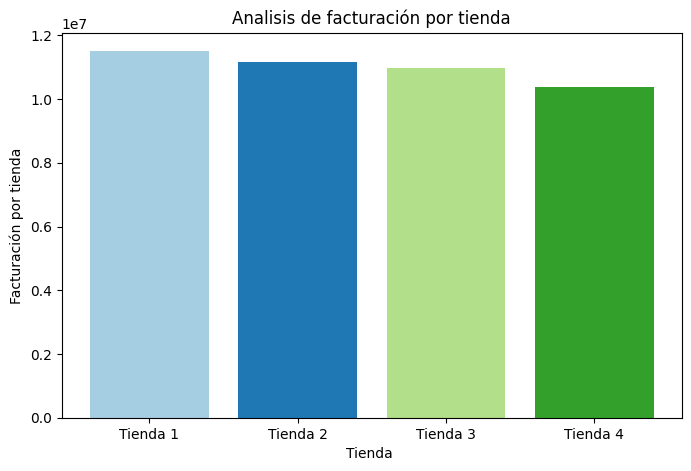

In [10]:
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
facturacion = [Facturacion_tienda, Facturacion_tienda2, Facturacion_tienda3, Facturacion_tienda4]

plt.figure(figsize=(8,5))
colores= mpl.colormaps['Paired']
plt.bar(tiendas, facturacion, color=colores.colors)
plt.xlabel("Tienda ")
plt.ylabel("Facturación por tienda")
plt.title("Analisis de facturación por tienda")
plt.show()

# 2. Ventas por categoría

In [13]:
ventas_por_categoria=[]

for tienda in tiendas:
  venta_categoria=tienda.groupby('Categoría del Producto')['Precio'].sum().sort_values()
  ventas_por_categoria.append(venta_categoria.sum())
  print('Ventas por categoría:\n',venta_categoria)
  print('')

Ventas por categoría:
 Categoría del Producto
Libros                       8784900.0
Artículos para el hogar     12698400.0
Juguetes                    17995700.0
Deportes y diversión        39290000.0
Instrumentos musicales      91299000.0
Muebles                    187633700.0
Electrodomésticos          363685200.0
Electrónicos               429493500.0
Name: Precio, dtype: float64

Ventas por categoría:
 Categoría del Producto
Libros                      10091200.0
Artículos para el hogar     14746900.0
Juguetes                    15945400.0
Deportes y diversión        34744500.0
Instrumentos musicales     104990300.0
Muebles                    176426300.0
Electrodomésticos          348567800.0
Electrónicos               410831100.0
Name: Precio, dtype: float64

Ventas por categoría:
 Categoría del Producto
Libros                       9498700.0
Artículos para el hogar     15060000.0
Juguetes                    19401100.0
Deportes y diversión        35593100.0
Instrumentos musicales

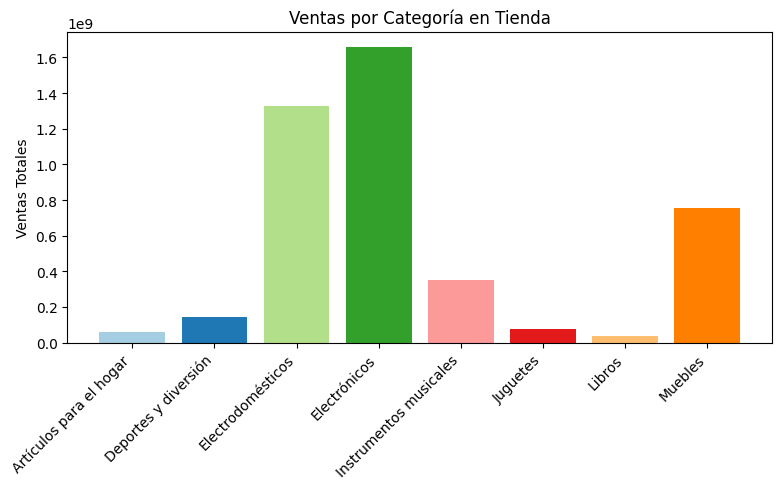

In [14]:
plt.figure(figsize=(8, 5))
colores= mpl.colormaps['Paired']
ventas_por_categoria_total = pd.concat(tiendas).groupby('Categoría del Producto')['Precio'].sum()
categorias = ventas_por_categoria_total.index
plt.bar(categorias, ventas_por_categoria_total, color=colores.colors)
plt.ylabel("Ventas Totales")
plt.title("Ventas por Categoría en Tienda")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [15]:
for tienda in tiendas:
  promedio_tienda=tienda['Calificación'].mean()
  print('Calificación promedio por tienda:', round(promedio_tienda,2))

Calificación promedio por tienda: 3.98
Calificación promedio por tienda: 4.04
Calificación promedio por tienda: 4.05
Calificación promedio por tienda: 4.0


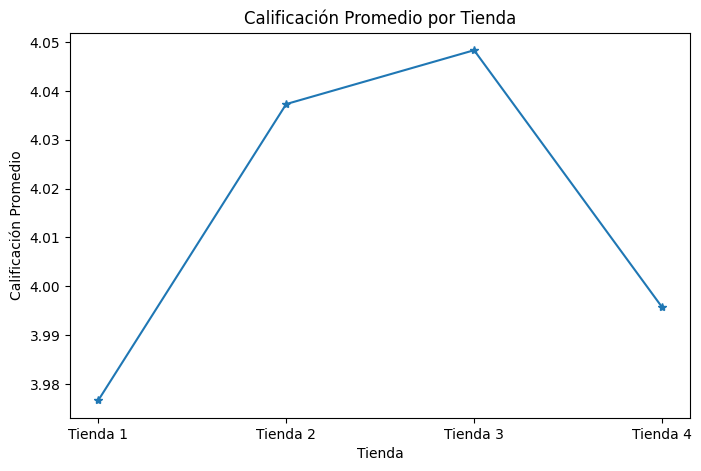

In [16]:
promedio_tienda = [tienda['Calificación'].mean() for tienda in tiendas]
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

plt.figure(figsize=(8, 5))
colores= mpl.colormaps['Paired']
plt.plot(nombres_tiendas, promedio_tienda, marker='*', linestyle='-')
plt.xlabel("Tienda")
plt.ylabel("Calificación Promedio")
plt.title("Calificación Promedio por Tienda")
plt.show()


# 4. Productos más y menos vendidos

In [17]:
for tienda in tiendas:
  producto_vendido = tienda.groupby('Producto')['Producto'].idxmax().sort_values(ascending=False)
  print('Productos mas vendido:\n',producto_vendido.head())
  print('')
  print('Productos menos vendido:\n',producto_vendido.tail())
  print('')

Productos mas vendido:
 Producto
Pandereta         209
Smart TV          173
Cama king         124
Mesa de centro    120
Smartwatch        110
Name: Producto, dtype: int64

Productos menos vendido:
 Producto
Silla de oficina     4
Microondas           3
Juego de mesa        2
Mesa de comedor      1
Asistente virtual    0
Name: Producto, dtype: int64

Productos mas vendido:
 Producto
Iphone 15                    202
Impresora                    156
Mesa de noche                148
Iniciando en programación    132
Smartwatch                   130
Name: Producto, dtype: int64

Productos menos vendido:
 Producto
Mochila              6
Guitarra acústica    5
Cama king            2
Pandereta            1
Silla de oficina     0
Name: Producto, dtype: int64

Productos mas vendido:
 Producto
Bloques de construcción    220
Cubo mágico 8x8            196
Microondas                 150
Celular ABXY               147
Vaso térmico               134
Name: Producto, dtype: int64

Productos menos vendi

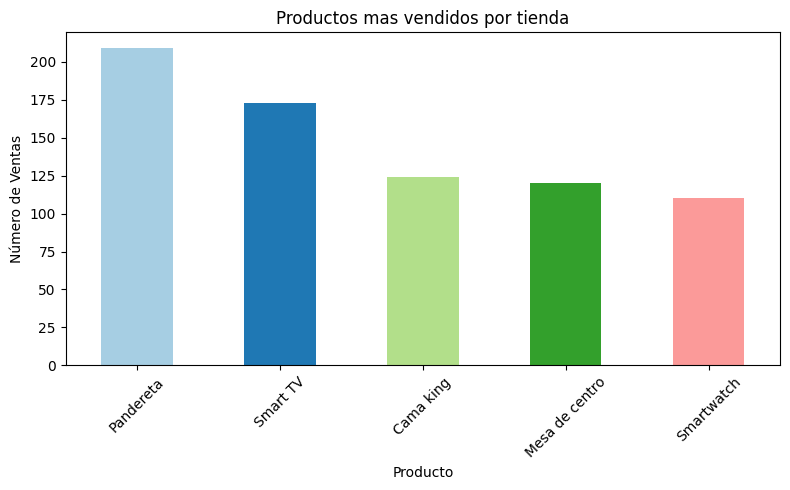

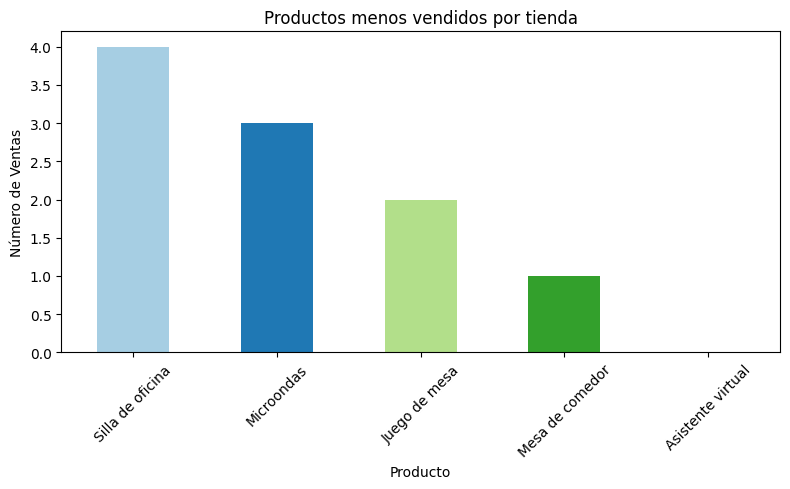

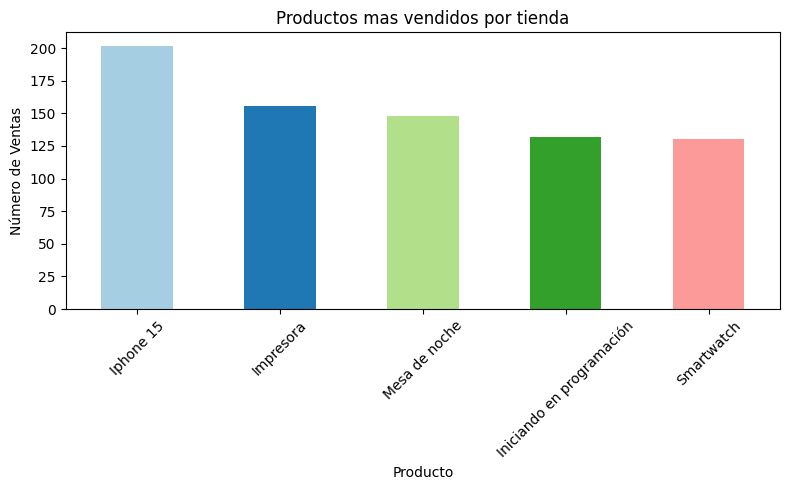

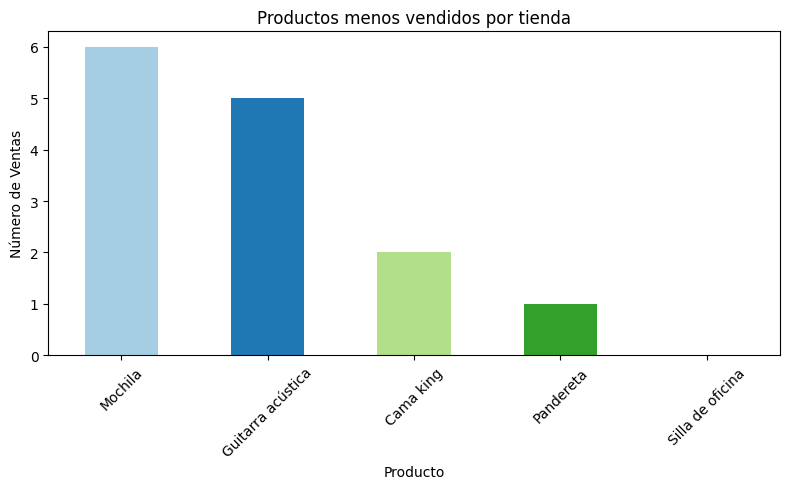

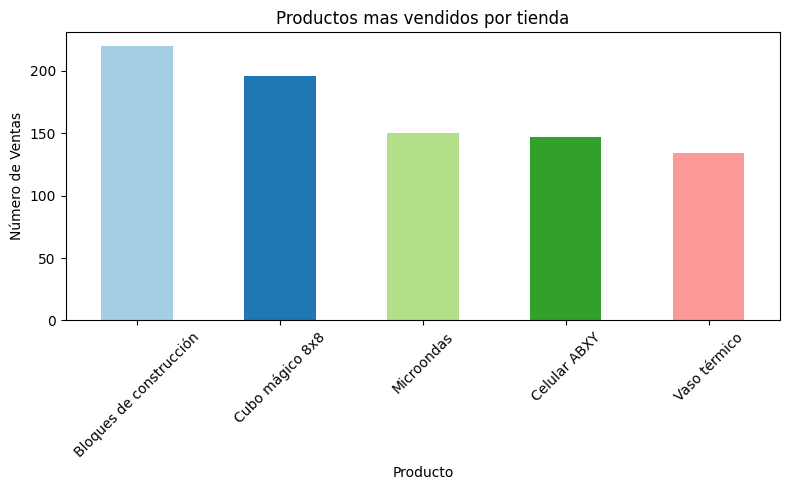

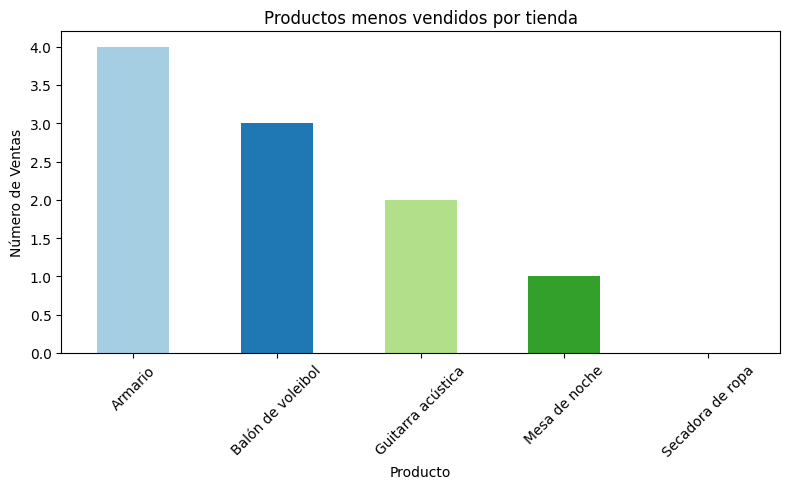

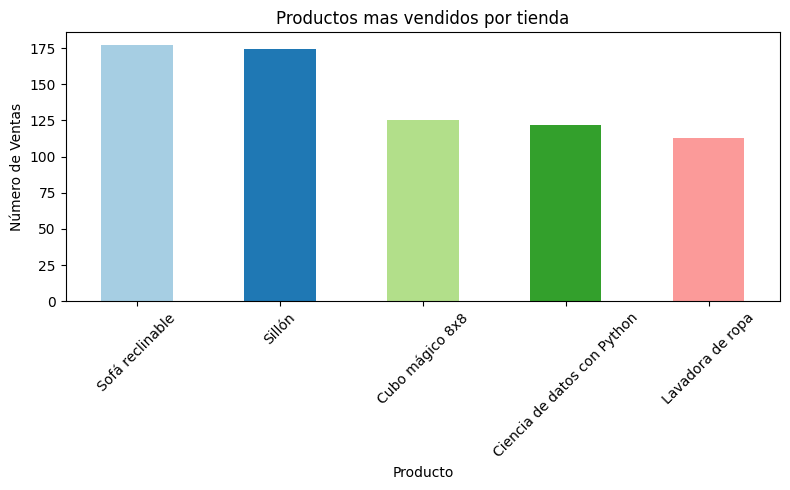

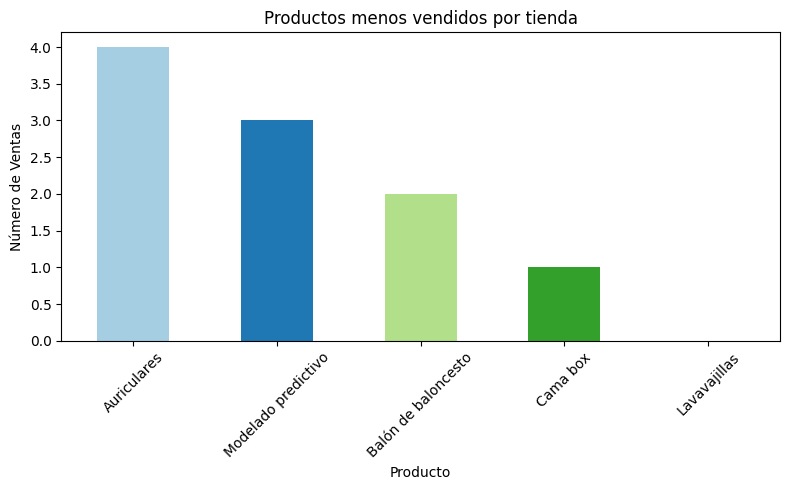

In [21]:
for tienda in tiendas:
  tienda.name=[]
  producto_vendido = tienda.groupby('Producto')['Producto'].idxmax().sort_values(ascending=False)

  plt.figure(figsize=(8, 5))
  colores= mpl.colormaps['Paired']
  producto_vendido.head().plot(kind='bar', color=colores.colors)
  plt.title(f'Productos mas vendidos por tienda')
  plt.ylabel('Número de Ventas')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

  plt.figure(figsize=(8, 5))
  colores= mpl.colormaps['Paired']
  producto_vendido.tail().plot(kind='bar', color=colores.colors)
  plt.title(f'Productos menos vendidos por tienda')
  plt.ylabel('Número de Ventas')
  plt.xticks(rotation=45)
  plt.tight_layout()
  plt.show()

# 5. Envío promedio por tienda

In [19]:
for tienda in tiendas:
  promedio_envio=round(tienda['Costo de envío'].mean())
  print(f'Costo promedio de envío por tienda:, ${promedio_envio:,f}')

Costo promedio de envío por tienda:, $26,019.000000
Costo promedio de envío por tienda:, $25,216.000000
Costo promedio de envío por tienda:, $24,806.000000
Costo promedio de envío por tienda:, $23,459.000000


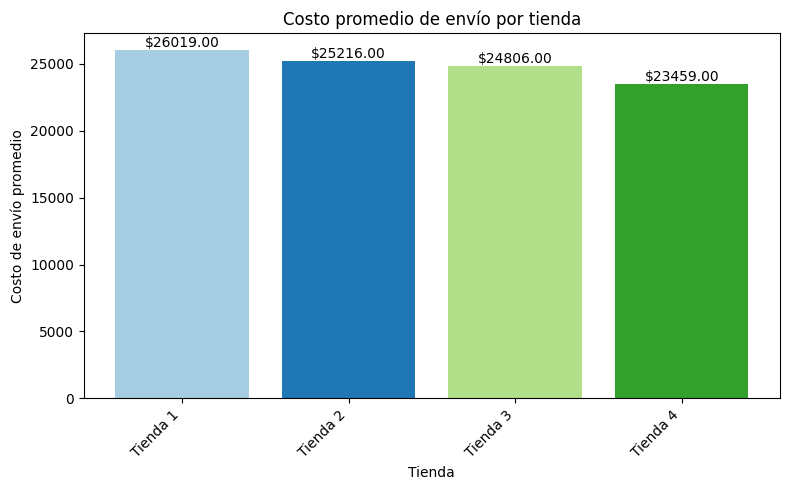

In [20]:
promedio_envio = [round(tienda['Costo de envío'].mean()) for tienda in tiendas]
promedio_nombre_t = pd.DataFrame({'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
                                  'Costo Envío Promedio (COP)': promedio_envio})


plt.figure(figsize=(8, 5))
colores = mpl.colormaps['Paired']
graficos = plt.bar(promedio_nombre_t['Tienda'], promedio_nombre_t['Costo Envío Promedio (COP)'].astype(float), color=colores.colors)
plt.title('Costo promedio de envío por tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de envío promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for grafico in graficos:
    height = grafico.get_height()
    plt.text(
        grafico.get_x() + grafico.get_width() / 2,
        height,
        f'${height:.2f}',
        ha='center',
        va='bottom'
    )

plt.show()